In [ ]:
## https://www.analyticsvidhya.com/blog/2021/07/image-denoising-using-autoencoders-a-beginners-guide-to-deep-learning-project/
!pip install tensorboard

In [ ]:
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from tensorflow.keras.callbacks import TensorBoard

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

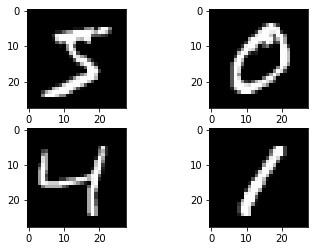

In [ ]:
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

In [ ]:
# create model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [ ]:
# Compile the model
model.compile(loss="mean_squared_error", optimizer='adam')

In [ ]:
!rm -rf logs

In [ ]:
import tensorflow as tf

log_folder = "logs"
file_writer_cm = tf.summary.create_file_writer(logdir)

#tensorboard = TensorBoard(log_dir="./logs/tboard")
callbacks = [
   TensorBoard(log_dir=log_folder, 
               histogram_freq=1, 
               write_graph=True,
               write_images=True,
               update_freq='epoch',
               profile_batch=2,
               embeddings_freq=1)]

In [ ]:
# Training model
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=25, batch_size=200, callbacks=callbacks)

Epoch 1/25
300/300 [==============================] - 3s 7ms/step - loss: 0.0686 - accuracy: 0.0085 - val_loss: 0.0194 - val_accuracy: 0.0113
Epoch 2/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0180 - accuracy: 0.0117 - val_loss: 0.0139 - val_accuracy: 0.0127
Epoch 3/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0136 - accuracy: 0.0124 - val_loss: 0.0115 - val_accuracy: 0.0140
Epoch 4/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0115 - accuracy: 0.0131 - val_loss: 0.0104 - val_accuracy: 0.0157
Epoch 5/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0102 - accuracy: 0.0136 - val_loss: 0.0094 - val_accuracy: 0.0140
Epoch 6/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0094 - accuracy: 0.0144 - val_loss: 0.0087 - val_accuracy: 0.0146
Epoch 7/25
300/300 [==============================] - 1s 4ms/step - loss: 0.0087 - accuracy: 0.0145 - val_loss: 0.0085 - val_accuracy: 0.0111
Epoch 

In [ ]:
%load_ext tensorboard
%tensorboard -- logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2021-07-28 19:05:21.882643: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_threads COUNT]
                   [--reload_interval SECONDS] [--reload_task TYPE]
                   [--reload_multifile BOOL]
                   [--reload_multifile_

In [ ]:
# Final evaluation of the model
pred = model.predict(x_test_noisy)

In [ ]:
pred.shape

(10000, 784)

Test Images


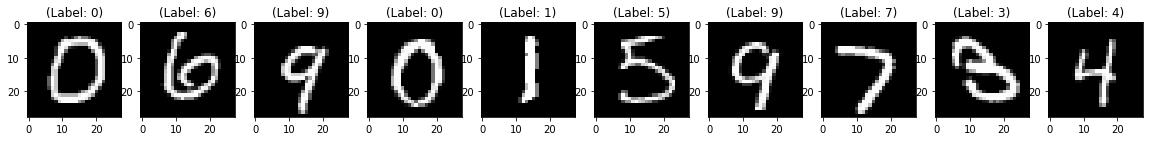

Test Images with Noise


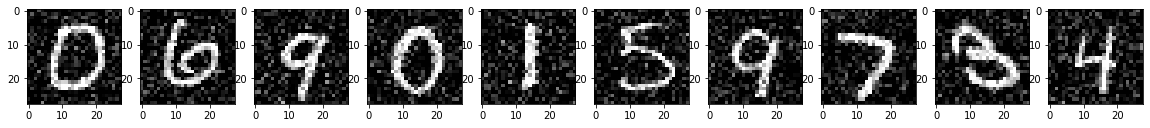

Reconstruction of Noisy Test Images


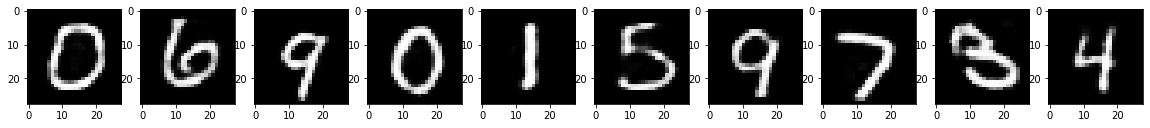

In [ ]:
X_test = numpy.reshape(X_test, (10000,28,28)) *255
pred = numpy.reshape(pred, (10000,28,28)) *255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) *255
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i,:,:], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i,:,:], cmap='gray')
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i,:,:], cmap='gray')  
plt.show()